<a href="https://colab.research.google.com/github/nt189/Regresion-Lineal-Simple-y-Multiple-/blob/main/Actividad%206%20(regrecion%20lineal%20simple%20y%20multiple).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de librerias y dataframe

In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from turtle import color
from sklearn.linear_model import LinearRegression

In [373]:
pais = 'mexico'
df = pd.read_csv('listings_' + pais + '.csv')

In [374]:
# Elimino las columnas que no voy a utilizar
colums = ['room_type',
'price',
'host_acceptance_rate',
'host_is_superhost',
'accommodates',
'bathrooms',
'review_scores_cleanliness',
'host_identity_verified',
'instant_bookable',
'property_type']

df = df[colums]

df.head(3)

,room_type,price,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable,property_type
0,Entire home/apt,"$3,865.00",NaN,f,2,1.0,NaN,t,f,Entire villa
1,Entire home/apt,NaN,93%,t,14,NaN,4.70,t,f,Entire home
2,Entire home/apt,"$2,029.00",57%,t,4,1.0,4.75,t,f,Entire rental unit


# Tratamiento de nulo

In [375]:
# Vemos que columnas tienen valores nulos
df.isnull().sum()

,0
room_type,0
price,2927
host_acceptance_rate,2869
host_is_superhost,1509
accommodates,0
bathrooms,2915
review_scores_cleanliness,3657
host_identity_verified,0
instant_bookable,0
property_type,0


In [376]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].replace('%', '', regex=True).astype(float)

df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(round(df['host_acceptance_rate'].median(), 1))
df['price'] = df['price'].fillna(round(df['price'].median(), 1))
df['host_is_superhost'] = df['host_is_superhost'].fillna('f')
df['bathrooms'] = df['bathrooms'].fillna(method = 'ffill')
df['review_scores_cleanliness'] = df['review_scores_cleanliness'].fillna(round(df['review_scores_cleanliness'].mean(),1))

<ipython-input-376-0e3f2db617bd>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['bathrooms'] = df['bathrooms'].fillna(method = 'ffill')


In [377]:
df.isnull().sum()

,0
room_type,0
price,0
host_acceptance_rate,0
host_is_superhost,0
accommodates,0
bathrooms,0
review_scores_cleanliness,0
host_identity_verified,0
instant_bookable,0
property_type,0


In [378]:
df['host_acceptance_rate']

,host_acceptance_rate
0,99.0
1,93.0
2,57.0
3,100.0
4,100.0
...,...
26577,100.0
26578,100.0
26579,100.0
26580,100.0


# Convercion de variables categoricas a numericas

In [379]:
# Obtenemos infomacion del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   room_type                  26582 non-null  object 
 1   price                      26582 non-null  float64
 2   host_acceptance_rate       26582 non-null  float64
 3   host_is_superhost          26582 non-null  object 
 4   accommodates               26582 non-null  int64  
 5   bathrooms                  26582 non-null  float64
 6   review_scores_cleanliness  26582 non-null  float64
 7   host_identity_verified     26582 non-null  object 
 8   instant_bookable           26582 non-null  object 
 9   property_type              26582 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.0+ MB


In [380]:
room_type_mapping = dict(enumerate(df["room_type"].astype("category").cat.categories))
print(room_type_mapping)
df["room_type"] = df["room_type"].astype("category").cat.codes

{0: 'Entire home/apt', 1: 'Hotel room', 2: 'Private room', 3: 'Shared room'}


In [381]:
categorias = {"f": 0, "t": 1}
df["host_is_superhost"] = df["host_is_superhost"].map(categorias)
df["host_identity_verified"] = df["host_identity_verified"].map(categorias)
df["instant_bookable"] = df["instant_bookable"].map(categorias)

In [382]:
property_type_mapping = dict(enumerate(df["property_type"].astype("category").cat.categories))
print(property_type_mapping)
df["property_type"] = df["property_type"].astype("category").cat.codes

{0: 'Boat', 1: 'Campsite', 2: 'Casa particular', 3: 'Castle', 4: 'Dome', 5: 'Earthen home', 6: 'Entire bungalow', 7: 'Entire cabin', 8: 'Entire chalet', 9: 'Entire condo', 10: 'Entire cottage', 11: 'Entire guest suite', 12: 'Entire guesthouse', 13: 'Entire home', 14: 'Entire home/apt', 15: 'Entire hostel', 16: 'Entire in-law', 17: 'Entire loft', 18: 'Entire place', 19: 'Entire rental unit', 20: 'Entire serviced apartment', 21: 'Entire townhouse', 22: 'Entire vacation home', 23: 'Entire villa', 24: 'Farm stay', 25: 'Holiday park', 26: 'Hut', 27: 'Private room', 28: 'Private room in barn', 29: 'Private room in bed and breakfast', 30: 'Private room in bungalow', 31: 'Private room in cabin', 32: 'Private room in casa particular', 33: 'Private room in castle', 34: 'Private room in chalet', 35: 'Private room in condo', 36: 'Private room in cottage', 37: 'Private room in dome', 38: 'Private room in dorm', 39: 'Private room in earthen home', 40: 'Private room in farm stay', 41: 'Private room i

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   room_type                  26582 non-null  int8   
 1   price                      26582 non-null  float64
 2   host_acceptance_rate       26582 non-null  float64
 3   host_is_superhost          26582 non-null  int64  
 4   accommodates               26582 non-null  int64  
 5   bathrooms                  26582 non-null  float64
 6   review_scores_cleanliness  26582 non-null  float64
 7   host_identity_verified     26582 non-null  int64  
 8   instant_bookable           26582 non-null  int64  
 9   property_type              26582 non-null  int8   
dtypes: float64(4), int64(4), int8(2)
memory usage: 1.7 MB


# Tratamiento para valores atipicos

In [384]:
# Creo 2 dataframe para poder procesar los outliers
cuantitativas = df.select_dtypes(include=[np.number])
cualitativas = df.select_dtypes(include=['object', 'category'])

In [385]:
df['host_acceptance_rate'].unique()

array([ 99.,  93.,  57., 100.,  98.,  78.,  95.,  67.,  75.,  88.,   0.,
        96.,  97.,  82.,  80.,  81.,  61.,  50.,  86.,  92.,  44.,  94.,
        25.,  30.,  60.,  43.,  62.,  89.,  73.,  71.,  90.,  65.,  53.,
        77.,  84.,  36.,  91.,  20.,  74.,  83.,  29.,  70.,  18.,  15.,
        79.,  66.,  17.,  85.,  68.,  33.,  31.,  11.,  40.,  32.,  10.,
        63.,  76.,  64.,  87.,  45.,  41.,  59.,  39.,   3.,  56.,  21.,
         8.,  69.,  22.,  47.,  58.,  72.,  37.,  55.,  28.,  52.,   6.,
        48.,   9.,  34.,  13.,  35.,  54.,  51.,   2.,  26.,  14.,  46.,
        24.,  19.,  23.,   5.,  49.,  27.,  38.,   4.,   7.,  42.])

In [386]:
# Metodo aplicando cuantiles. Encuentro cuartiles 0.25 y 0.75
y = cuantitativas

percentiles25  = y.quantile(0.25)
percentiles75 = y.quantile(0.75)
iqr = percentiles75 - percentiles25

Limite_Superior_iqr = percentiles75 + 1.5*iqr
Limite_Inferior_iqr = percentiles25 - 1.5*iqr

print("Limite superior permitido")
print(Limite_Superior_iqr)
print("Limite inferior permitido")
print(Limite_Inferior_iqr)

Limite superior permitido
room_type                       5.000
price                        2713.500
host_acceptance_rate          106.000
host_is_superhost               2.500
accommodates                    7.000
bathrooms                       3.500
review_scores_cleanliness       5.265
host_identity_verified          1.000
instant_bookable                2.500
property_type                  81.500
dtype: float64
Limite inferior permitido
room_type                     -3.000
price                       -578.500
host_acceptance_rate          90.000
host_is_superhost             -1.500
accommodates                  -1.000
bathrooms                     -0.500
review_scores_cleanliness      4.425
host_identity_verified         1.000
instant_bookable              -1.500
property_type                -18.500
dtype: float64


In [387]:
# Obtenemos datos limpios del DataFrame
Datos_sin_Outliers_iqr = cuantitativas[(y <= Limite_Superior_iqr) & (y >= Limite_Inferior_iqr)]

In [388]:
# Remplazamos valores atipicos del dataframe con mean
df_clean_iqr = Datos_sin_Outliers_iqr.copy()
df_clean_iqr = df_clean_iqr.fillna(round(Datos_sin_Outliers_iqr.mean(),1))

In [389]:
# contar nulos por columnas
df_clean_iqr.isnull().sum()

,0
room_type,0
price,0
host_acceptance_rate,0
host_is_superhost,0
accommodates,0
bathrooms,0
review_scores_cleanliness,0
host_identity_verified,0
instant_bookable,0
property_type,0


In [390]:
df_clean_iqr['host_acceptance_rate'].unique()

array([ 99. ,  93. ,  98.8, 100. ,  98. ,  95. ,  96. ,  97. ,  92. ,
        94. ,  90. ,  91. ])

In [391]:
df = df_clean_iqr.copy()

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   room_type                  26582 non-null  int8   
 1   price                      26582 non-null  float64
 2   host_acceptance_rate       26582 non-null  float64
 3   host_is_superhost          26582 non-null  int64  
 4   accommodates               26582 non-null  float64
 5   bathrooms                  26582 non-null  float64
 6   review_scores_cleanliness  26582 non-null  float64
 7   host_identity_verified     26582 non-null  float64
 8   instant_bookable           26582 non-null  int64  
 9   property_type              26582 non-null  float64
dtypes: float64(7), int64(2), int8(1)
memory usage: 1.9 MB


# Separación de tipos de habitaciones

In [393]:
room_type_mapping

{0: 'Entire home/apt', 1: 'Hotel room', 2: 'Private room', 3: 'Shared room'}

In [394]:
entire = df.copy()
private = df.copy()
shared = df.copy()
hotel = df.copy()

In [395]:
for key, value in room_type_mapping.items():
  if value == 'Entire home/apt':
    entire = entire[entire['room_type'] == key]
  elif value == 'Private room':
    private = private[private['room_type'] == key]
  elif value == 'Shared room':
    shared = shared[shared['room_type'] == key]
  elif value == 'Hotel room':
    hotel = hotel[hotel['room_type'] == key]

# Regrecion lineal simple

In [396]:
def reglineal(var_dep, vars_indep):
  model = LinearRegression()
  model.fit(X = vars_indep, y = var_dep)
  print('Modelo matematico: y = ' + str(model.coef_) + ' | X = ' + str(model.intercept_))
  print('Coeficiencia del modelo apartir del coeficiente R (coeficiente de determinacion): ' + str(model.score(vars_indep, var_dep)))
  print('Coeficiente de correlacion ' + str(np.sqrt(model.score(vars_indep, var_dep))))
  y_pred = model.predict(X = vars_indep)
  return y_pred



In [397]:
entire_pred = pd.DataFrame()
private_pred = pd.DataFrame()
shared_pred = pd.DataFrame()
hotel_pred = pd.DataFrame()

In [398]:
# Inserción de predicciones en habitaciones enteras
print('Predicciones en habitaciones enteras')
print('--------------------------------')
print('pred_price_vs_host_acceptance_rate')
entire_pred.insert(0, 'pred_price_vs_host_acceptance_rate', reglineal(entire['price'], entire[['host_acceptance_rate']]))
print('--------------------------------')
print('pred_price_vs_host_is_superhost')
entire_pred.insert(0, 'pred_price_vs_host_is_superhost', reglineal(entire['price'], entire[['host_is_superhost']]))
print('--------------------------------')
print('pred_price_vs_accommodates')
entire_pred.insert(0, 'pred_accommodates_vs_bathrooms', reglineal(entire['accommodates'], entire[['bathrooms']]))
print('--------------------------------')
print('pred_price_vs_review_scores_cleanliness')
entire_pred.insert(0, 'pred_price_vs_review_scores_cleanliness', reglineal(entire['price'], entire[['review_scores_cleanliness']]))
print('--------------------------------')
print('pred_price_vs_host_identity_verified')
entire_pred.insert(0, 'pred_price_vs_host_identity_verified', reglineal(entire['price'], entire[['host_identity_verified']]))
print('--------------------------------')
print('pred_price_vs_instant_bookable')
entire_pred.insert(0, 'pred_price_vs_instant_bookable', reglineal(entire['price'], entire[['instant_bookable']]))
print('--------------------------------')
print('pred_price_vs_property_type')
entire_pred.insert(0, 'pred_price_vs_property_type', reglineal(entire['price'], entire[['property_type']]))

Predicciones en habitaciones enteras
--------------------------------
pred_price_vs_host_acceptance_rate
Modelo matematico: y = [6.48163789] | X = 549.5990662480058
Coeficiencia del modelo apartir del coeficiente R (coeficiente de determinacion): 0.000566638261235819
Coeficiente de correlacion 0.02380416478761267
--------------------------------
pred_price_vs_host_is_superhost
Modelo matematico: y = [57.1408425] | X = 1166.2979583706804
Coeficiencia del modelo apartir del coeficiente R (coeficiente de determinacion): 0.0033495272373170737
Coeficiente de correlacion 0.05787510032230678
--------------------------------
pred_price_vs_accommodates
Modelo matematico: y = [0.93648018] | X = 2.127516665771754
Coeficiencia del modelo apartir del coeficiente R (coeficiente de determinacion): 0.1675569641434531
Coeficiente de correlacion 0.4093372254553122
--------------------------------
pred_price_vs_review_scores_cleanliness
Modelo matematico: y = [367.02340481] | X = -584.6898605607814
Coefi

In [399]:
# Inserción de predicciones en habitaciones privadas
print('Predicciones en habitaciones enteras')
print('--------------------------------')
print('pred_price_vs_host_acceptance_rate')
private_pred.insert(0, 'pred_price_vs_host_acceptance_rate', reglineal(private['price'], private[['host_acceptance_rate']]))
print('--------------------------------')
print('pred_price_vs_host_is_superhost')
private_pred.insert(0, 'pred_price_vs_host_is_superhost', reglineal(private['price'], private[['host_is_superhost']]))
print('--------------------------------')
print('pred_price_vs_accommodates')
private_pred.insert(0, 'pred_accommodates_vs_bathrooms', reglineal(private['accommodates'], private[['bathrooms']]))
print('--------------------------------')
print('pred_price_vs_review_scores_cleanliness')
private_pred.insert(0, 'pred_price_vs_review_scores_cleanliness', reglineal(private['price'], private[['review_scores_cleanliness']]))
print('--------------------------------')
print('pred_price_vs_host_identity_verified')
private_pred.insert(0, 'pred_price_vs_host_identity_verified', reglineal(private['price'], private[['host_identity_verified']]))
print('--------------------------------')
print('pred_price_vs_instant_bookable')
private_pred.insert(0, 'pred_price_vs_instant_bookable', reglineal(private['price'], private[['instant_bookable']]))
print('--------------------------------')
print('pred_price_vs_property_type')
private_pred.insert(0, 'pred_price_vs_property_type', reglineal(private['price'], private[['property_type']]))

Predicciones en habitaciones enteras
--------------------------------
pred_price_vs_host_acceptance_rate
Modelo matematico: y = [15.34735354] | X = -788.8299091564189
Coeficiencia del modelo apartir del coeficiente R (coeficiente de determinacion): 0.005032617823494845
Coeficiente de correlacion 0.07094094602903774
--------------------------------
pred_price_vs_host_is_superhost
Modelo matematico: y = [-48.31813352] | X = 738.09731089794
Coeficiencia del modelo apartir del coeficiente R (coeficiente de determinacion): 0.0028426018069593884
Coeficiente de correlacion 0.05331605580835278
--------------------------------
pred_price_vs_accommodates
Modelo matematico: y = [0.12849905] | X = 1.776993543494453
Coeficiencia del modelo apartir del coeficiente R (coeficiente de determinacion): 0.004581291929224851
Coeficiente de correlacion 0.06768524159094692
--------------------------------
pred_price_vs_review_scores_cleanliness
Modelo matematico: y = [345.85458501] | X = -945.3975234765138
C

In [400]:
# Inserción de predicciones en habitaciones compartidas
print('Predicciones en habitaciones enteras')
print('--------------------------------')
print('pred_price_vs_host_acceptance_rate')
shared_pred.insert(0, 'pred_price_vs_host_acceptance_rate', reglineal(shared['price'], shared[['host_acceptance_rate']]))
print('--------------------------------')
print('pred_price_vs_host_is_superhost')
shared_pred.insert(0, 'pred_price_vs_host_is_superhost', reglineal(shared['price'], shared[['host_is_superhost']]))
print('--------------------------------')
print('pred_price_vs_accommodates')
shared_pred.insert(0, 'pred_accommodates_vs_bathrooms', reglineal(shared['accommodates'], shared[['bathrooms']]))
print('--------------------------------')
print('pred_price_vs_review_scores_cleanliness')
shared_pred.insert(0, 'pred_price_vs_review_scores_cleanliness', reglineal(shared['price'], shared[['review_scores_cleanliness']]))
print('--------------------------------')
print('pred_price_vs_host_identity_verified')
shared_pred.insert(0, 'pred_price_vs_host_identity_verified', reglineal(shared['price'], shared[['host_identity_verified']]))
print('--------------------------------')
print('pred_price_vs_instant_bookable')
shared_pred.insert(0, 'pred_price_vs_instant_bookable', reglineal(shared['price'], shared[['instant_bookable']]))
print('--------------------------------')
print('pred_price_vs_property_type')
shared_pred.insert(0, 'pred_price_vs_property_type', reglineal(shared['price'], shared[['property_type']]))

Predicciones en habitaciones enteras
--------------------------------
pred_price_vs_host_acceptance_rate
Modelo matematico: y = [16.85212117] | X = -1241.6819004550584
Coeficiencia del modelo apartir del coeficiente R (coeficiente de determinacion): 0.0043051003516821895
Coeficiente de correlacion 0.06561326353476246
--------------------------------
pred_price_vs_host_is_superhost
Modelo matematico: y = [-79.12811634] | X = 431.47811634349034
Coeficiencia del modelo apartir del coeficiente R (coeficiente de determinacion): 0.004626206742887939
Coeficiente de correlacion 0.06801622411519137
--------------------------------
pred_price_vs_accommodates
Modelo matematico: y = [0.12320631] | X = 1.423333718031576
Coeficiencia del modelo apartir del coeficiente R (coeficiente de determinacion): 0.005926103969027374
Coeficiente de correlacion 0.07698119230713028
--------------------------------
pred_price_vs_review_scores_cleanliness
Modelo matematico: y = [74.87163016] | X = 63.02119092721244

In [401]:
# Inserción de predicciones en habitaciones hotel
print('Predicciones en habitaciones enteras')
print('--------------------------------')
print('pred_price_vs_host_acceptance_rate')
hotel_pred.insert(0, 'pred_price_vs_host_acceptance_rate', reglineal(hotel['price'], hotel[['host_acceptance_rate']]))
print('--------------------------------')
print('pred_price_vs_host_is_superhost')
hotel_pred.insert(0, 'pred_price_vs_host_is_superhost', reglineal(hotel['price'], hotel[['host_is_superhost']]))
print('--------------------------------')
print('pred_price_vs_accommodates')
hotel_pred.insert(0, 'pred_accommodates_vs_bathrooms', reglineal(hotel['accommodates'], hotel[['bathrooms']]))
print('--------------------------------')
print('pred_price_vs_review_scores_cleanliness')
hotel_pred.insert(0, 'pred_price_vs_review_scores_cleanliness', reglineal(hotel['price'], hotel[['review_scores_cleanliness']]))
print('--------------------------------')
print('pred_price_vs_host_identity_verified')
hotel_pred.insert(0, 'pred_price_vs_host_identity_verified', reglineal(hotel['price'], hotel[['host_identity_verified']]))
print('--------------------------------')
print('pred_price_vs_instant_bookable')
hotel_pred.insert(0, 'pred_price_vs_instant_bookable', reglineal(hotel['price'], hotel[['instant_bookable']]))
print('--------------------------------')
print('pred_price_vs_property_type')
hotel_pred.insert(0, 'pred_price_vs_property_type', reglineal(hotel['price'], hotel[['property_type']]))

Predicciones en habitaciones enteras
--------------------------------
pred_price_vs_host_acceptance_rate
Modelo matematico: y = [-16.53077823] | X = 2747.6708601521354
Coeficiencia del modelo apartir del coeficiente R (coeficiente de determinacion): 0.006609992526285469
Coeficiente de correlacion 0.08130186053397222
--------------------------------
pred_price_vs_host_is_superhost
Modelo matematico: y = [20.43424846] | X = 1106.5851063829784
Coeficiencia del modelo apartir del coeficiente R (coeficiente de determinacion): 0.0006623779168015709
Coeficiente de correlacion 0.025736703689508703
--------------------------------
pred_price_vs_accommodates
Modelo matematico: y = [1.18616898] | X = 1.3432569938240977
Coeficiencia del modelo apartir del coeficiente R (coeficiente de determinacion): 0.29223709140378185
Coeficiente de correlacion 0.5405895775944832
--------------------------------
pred_price_vs_review_scores_cleanliness
Modelo matematico: y = [275.24414311] | X = -220.132501109526

# Mapas de calor

In [402]:
correlacion = df.corr()
correlacionabs = abs(correlacion)
correlacionabs

,room_type,price,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable,property_type
room_type,1.000000,0.447010,0.052963,0.162321,0.509455,0.162194,0.026277,NaN,0.070908,0.901475
price,0.447010,1.000000,0.057085,0.096543,0.406732,0.264883,0.103253,NaN,0.127622,0.385657
host_acceptance_rate,0.052963,0.057085,1.000000,0.013469,0.020656,0.000264,0.003729,NaN,0.178539,0.031721
host_is_superhost,0.162321,0.096543,0.013469,1.000000,0.102529,0.027610,0.168610,NaN,0.051291,0.169167
accommodates,0.509455,0.406732,0.020656,0.102529,1.000000,0.371414,0.004960,NaN,0.058230,0.464738
bathrooms,0.162194,0.264883,0.000264,0.027610,0.371414,1.000000,0.014868,NaN,0.007060,0.153432
review_scores_cleanliness,0.026277,0.103253,0.003729,0.168610,0.004960,0.014868,1.000000,NaN,0.077788,0.027575
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,0.070908,0.127622,0.178539,0.051291,0.058230,0.007060,0.077788,NaN,1.000000,0.030173
property_type,0.901475,0.385657,0.031721,0.169167,0.464738,0.153432,0.027575,NaN,0.030173,1.000000


<Axes: >

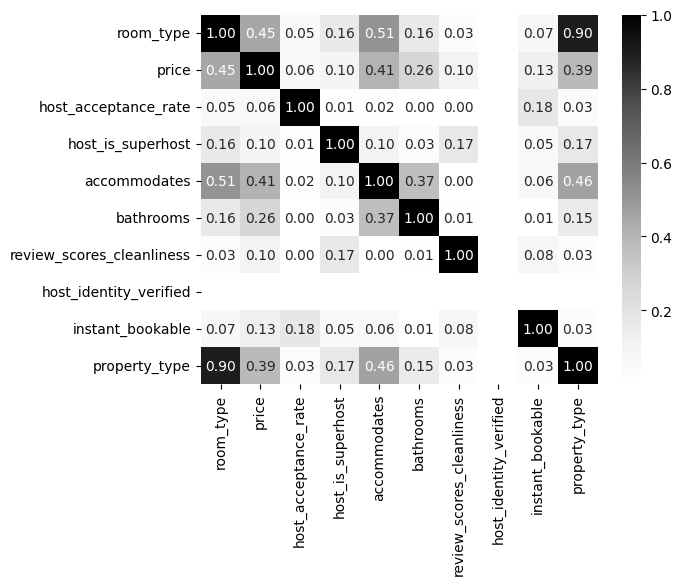

In [403]:
sns.heatmap(correlacionabs, cmap = "Grays", annot = True, fmt = ".2f")

<Axes: >

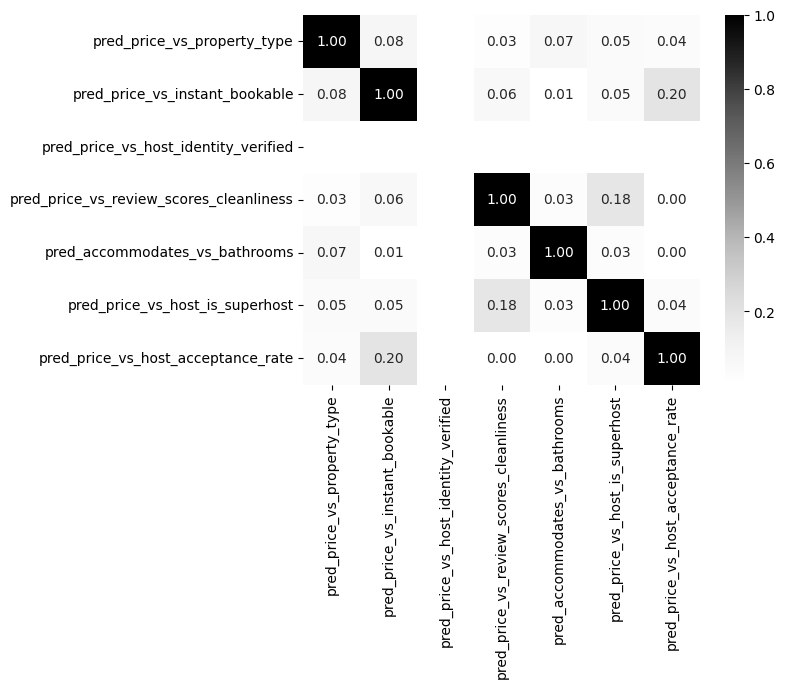

In [404]:
# Variable apartamentos enteros
sns.heatmap(abs(entire_pred.corr()), cmap = "Grays", annot = True, fmt = ".2f")

<Axes: >

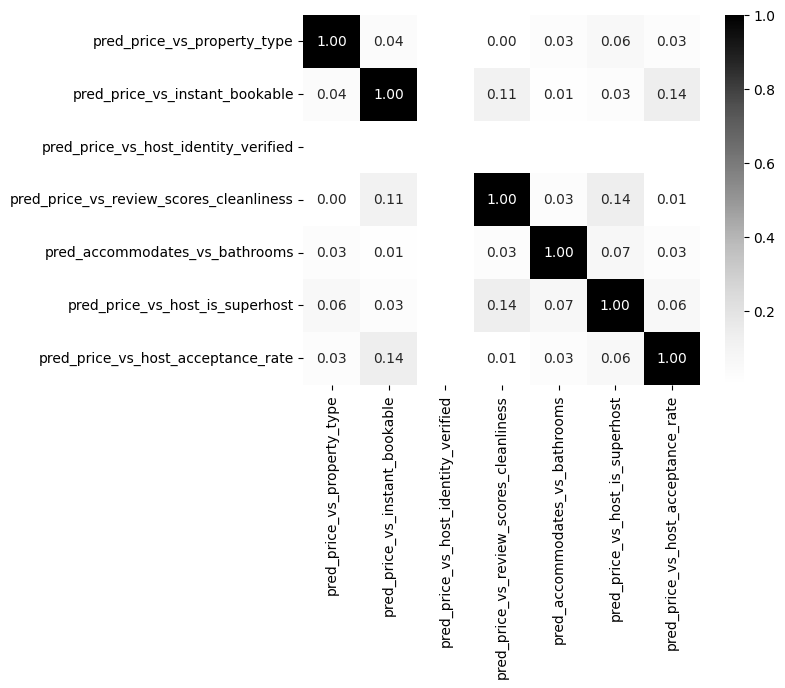

In [405]:
# Variable habitaciones privadas
sns.heatmap(abs(private_pred.corr()), cmap = "Grays", annot = True, fmt = ".2f")

<Axes: >

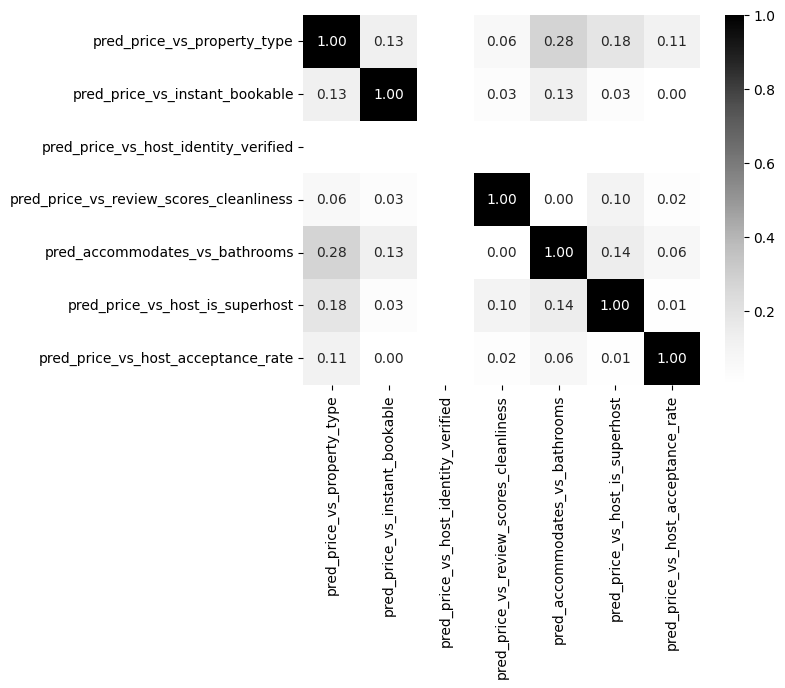

In [406]:
# Variable habitaciones compartidas
sns.heatmap(abs(shared_pred.corr()), cmap = "Grays", annot = True, fmt = ".2f")

<Axes: >

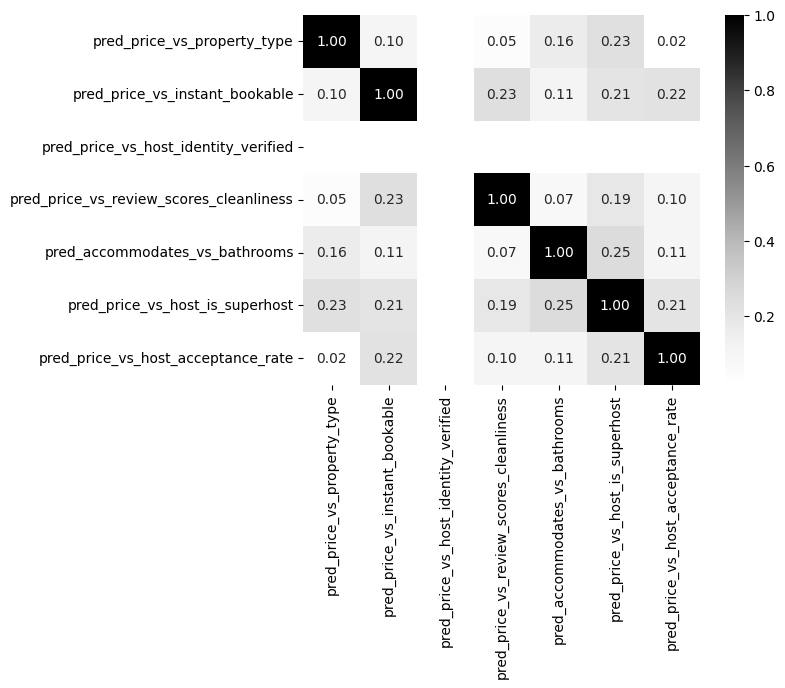

In [407]:
# Variable habitaciones de hotel
sns.heatmap(abs(hotel_pred.corr()), cmap = "Grays", annot = True, fmt = ".2f")

In [408]:
hotel_pred['pred_price_vs_property_type'].corr(hotel_pred['pred_price_vs_instant_bookable'])

0.10074725571284686

In [409]:
hotel_pred.corr()

,pred_price_vs_property_type,pred_price_vs_instant_bookable,pred_price_vs_host_identity_verified,pred_price_vs_review_scores_cleanliness,pred_accommodates_vs_bathrooms,pred_price_vs_host_is_superhost,pred_price_vs_host_acceptance_rate
pred_price_vs_property_type,1.000000,0.100747,NaN,-0.048672,0.162307,0.226589,0.018968
pred_price_vs_instant_bookable,0.100747,1.000000,NaN,0.232222,-0.114604,0.205383,0.216261
pred_price_vs_host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pred_price_vs_review_scores_cleanliness,-0.048672,0.232222,NaN,1.000000,-0.074820,-0.187744,0.104057
pred_accommodates_vs_bathrooms,0.162307,-0.114604,NaN,-0.074820,1.000000,-0.250071,-0.106214
pred_price_vs_host_is_superhost,0.226589,0.205383,NaN,-0.187744,-0.250071,1.000000,0.208806
pred_price_vs_host_acceptance_rate,0.018968,0.216261,NaN,0.104057,-0.106214,0.208806,1.000000
